In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

import perturbseq as perturb

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-07-09'
FIGS=DATA+'/Figures/'

PROTEIN='KRAS'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/'+PROTEIN
counts=20000
pref=SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)

In [3]:
adata=sc.read(pref+'.h5ad',cache=False)
adata

Only considering the two last: ['.counts_per_cell20000', '.h5ad'].
Only considering the two last: ['.counts_per_cell20000', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 24482 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [4]:
#get the original counts
results_prefix=DATA+'/'+PROTEIN+'/processed_data/A549.'+PROTEIN
adata_all=sc.read(results_prefix+'.raw.h5ad')
adata_all

Only considering the two last: ['.raw', '.h5ad'].
Only considering the two last: ['.raw', '.h5ad'].


AnnData object with n_obs × n_vars = 192000 × 33694 
    obs: 'batch'

In [5]:
sc.pp.filter_cells(adata_all, min_genes=200)
sc.pp.filter_genes(adata_all, min_cells=3)

filtered out 14754 cells that have less than 200 genes expressed
filtered out 9212 genes that are detected in less than 3 cells


In [6]:
adata_all.obs['n_counts'] = adata_all.X.sum(axis=1).A1
max(adata_all.obs['n_counts'])

146897.0

In [7]:
import copy
adata_all.obs['n_counts_downsampled'] = adata_all.X.sum(axis=1).A1
adata_all.obs['n_counts_original'] = copy.deepcopy(adata_all.obs['n_counts'])

In [8]:
adata_all.obs_names[:3]

Index(['AAACCTGCAACGCACC-1-0', 'AAACCTGCAATGGTCT-1-0', 'AAACCTGCACGTAAGG-1-0'], dtype='object')

In [9]:
protein_obs=[]
batch_num=[]
new_obsnames=[]

for i in range(adata.n_obs):
    to_add=0
    protein_here=PROTEIN
    if protein_here=='KRAS':
        to_add=32
    new_obsnames.append(str(adata.obs_names[i].split('-')[0]))
    
adata.obs_names=new_obsnames

In [10]:
protein_obs=[]
batch_num=[]
new_obsnames=[]

for i in range(adata_all.n_obs):
    to_add=0
    protein_here=PROTEIN
    if protein_here=='KRAS':
        to_add=32
    batch_here=int(adata_all.obs_names[i].split('-1-')[1])+to_add
    protein_obs.append(protein_here)
    batch_num.append(batch_here)
    new_obsnames.append('ch'.join(adata_all.obs_names[i].split('-1-')))
    
adata_all.obs_names=new_obsnames

In [11]:
adata.write(pref+'.raw.preanno.h5ad')

In [12]:
adata=sc.read(pref+'.raw.preanno.h5ad')
adata

Only considering the two last: ['.preanno', '.h5ad'].
Only considering the two last: ['.preanno', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 24482 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [13]:
adata.obs['n_counts_original']=adata_all[adata.obs_names,:].obs['n_counts_original']

In [14]:
#add anno
cells2guide_file='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-07-09/'+PROTEIN+'/processed_data/A549.'+PROTEIN+'.anno.vbc_TPTfiltered1.0_umi_counts.mut_std.gz'
perturb.io.read_perturbations_csv(adata,
                       cell2guide_csv=cells2guide_file,
                      guide2gene_csv=None,
                      sep=',')

annotated cells: 153365
adata cells: 150044 | 77.0 percent annotated


In [15]:
adata

AnnData object with n_obs × n_vars = 150044 × 24482 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt', 'n_counts_original', 'guide', 'guide.compact', 'G12F', 'S136N', 'T50P', 'G12S', 'A146P', 'D33E', 'G12Y', 'G12A', 'G13V', 'I36M', 'R68S', 'K147T', 'A146T', 'G75A', 'G12C', 'Q61L', 'S17S', 'T158T', 'V14L', 'R135T', 'G60D', 'K117R', 'R41K', 'WT', 'T20M', 'E63K', 'Q99E', 'L79I', 'L19F', 'Q61R', 'Q61A', 'V14I', 'G12D', 'M111L', 'Q25H', 'K176Q', 'G60S', 'T50T', 'Y166H', 'A66A', 'A146V', 'T127T', 'K117N', 'L52F', 'V112I', 'I163S', 'C185Y', 'E31K', 'P34L', 'Q22K', 'P110S', 'A59T', 'L159S', 'G13E', 'A155G', 'T144T', 'R164Q', 'D57N', 'G60V', 'A59G', 'A59E', 'AG11TD', 'T20T', 'T74A', 'M170L', 'C118S', 'G13C', 'P34R', 'K88K', 'Q61H', 'F141L', 'D30D', 'G77A', 'Q61P', 'T74T', 'D119G', 'T50I', 'Q61K', 'D173D', 'K178K', 'N26Y', 'G12V', 'K179R', 'G12R', 'A130V', 'V8V', 'R149K', 'K169K', 'T144P', 'K5E', 'AG59GV', 'T58

In [16]:
adata.write(pref+'.raw.anno.h5ad')

... storing 'guide' as categorical
... storing 'guide.compact' as categorical


In [17]:
adata=sc.read(pref+'.raw.anno.h5ad')
adata

Only considering the two last: ['.anno', '.h5ad'].
Only considering the two last: ['.anno', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 24482 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt', 'n_counts_original', 'guide', 'guide.compact', 'G12F', 'S136N', 'T50P', 'G12S', 'A146P', 'D33E', 'G12Y', 'G12A', 'G13V', 'I36M', 'R68S', 'K147T', 'A146T', 'G75A', 'G12C', 'Q61L', 'S17S', 'T158T', 'V14L', 'R135T', 'G60D', 'K117R', 'R41K', 'WT', 'T20M', 'E63K', 'Q99E', 'L79I', 'L19F', 'Q61R', 'Q61A', 'V14I', 'G12D', 'M111L', 'Q25H', 'K176Q', 'G60S', 'T50T', 'Y166H', 'A66A', 'A146V', 'T127T', 'K117N', 'L52F', 'V112I', 'I163S', 'C185Y', 'E31K', 'P34L', 'Q22K', 'P110S', 'A59T', 'L159S', 'G13E', 'A155G', 'T144T', 'R164Q', 'D57N', 'G60V', 'A59G', 'A59E', 'AG11TD', 'T20T', 'T74A', 'M170L', 'C118S', 'G13C', 'P34R', 'K88K', 'Q61H', 'F141L', 'D30D', 'G77A', 'Q61P', 'T74T', 'D119G', 'T50I', 'Q61K', 'D173D', 'K178K', 'N26Y', 'G12V', 'K179R', 'G12R', 'A130V', 'V8V', 'R149K', 'K169K', 'T144P', 'K5E', 'AG59GV', 'T58

In [18]:
variants=perturb.util.get_perturbations(adata,compact=True)

In [19]:
print(variants)

['A130V', 'A146P', 'A146T', 'A146V', 'A155G', 'A59E', 'A59G', 'A59T', 'A66A', 'AG11TD', 'AG59GV', 'C118S', 'C185Y', 'D119G', 'D173D', 'D30D', 'D33E', 'D57N', 'E31K', 'E63K', 'F141L', 'G12A', 'G12C', 'G12D', 'G12F', 'G12I', 'G12R', 'G12S', 'G12V', 'G12Y', 'G13C', 'G13E', 'G13R', 'G13V', 'G60D', 'G60S', 'G60V', 'G75A', 'G77A', 'I163S', 'I36M', 'K117N', 'K117R', 'K147N', 'K147T', 'K169K', 'K176Q', 'K178K', 'K179R', 'K5E', 'K88K', 'L159S', 'L19F', 'L52F', 'L79I', 'M111L', 'M170L', 'N26Y', 'P110S', 'P34L', 'P34R', 'Q22H', 'Q22K', 'Q25H', 'Q61A', 'Q61H', 'Q61K', 'Q61L', 'Q61P', 'Q61R', 'Q99E', 'R135T', 'R149K', 'R164Q', 'R41K', 'R68S', 'S136N', 'S17S', 'T127T', 'T144P', 'T144T', 'T158A', 'T158T', 'T20M', 'T20R', 'T20T', 'T50I', 'T50P', 'T50T', 'T58I', 'T74A', 'T74T', 'V112I', 'V14I', 'V14L', 'V8V', 'WT', 'Y166H']


In [20]:
adata

AnnData object with n_obs × n_vars = 150044 × 24482 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt', 'n_counts_original', 'guide', 'guide.compact', 'G12F', 'S136N', 'T50P', 'G12S', 'A146P', 'D33E', 'G12Y', 'G12A', 'G13V', 'I36M', 'R68S', 'K147T', 'A146T', 'G75A', 'G12C', 'Q61L', 'S17S', 'T158T', 'V14L', 'R135T', 'G60D', 'K117R', 'R41K', 'WT', 'T20M', 'E63K', 'Q99E', 'L79I', 'L19F', 'Q61R', 'Q61A', 'V14I', 'G12D', 'M111L', 'Q25H', 'K176Q', 'G60S', 'T50T', 'Y166H', 'A66A', 'A146V', 'T127T', 'K117N', 'L52F', 'V112I', 'I163S', 'C185Y', 'E31K', 'P34L', 'Q22K', 'P110S', 'A59T', 'L159S', 'G13E', 'A155G', 'T144T', 'R164Q', 'D57N', 'G60V', 'A59G', 'A59E', 'AG11TD', 'T20T', 'T74A', 'M170L', 'C118S', 'G13C', 'P34R', 'K88K', 'Q61H', 'F141L', 'D30D', 'G77A', 'Q61P', 'T74T', 'D119G', 'T50I', 'Q61K', 'D173D', 'K178K', 'N26Y', 'G12V', 'K179R', 'G12R', 'A130V', 'V8V', 'R149K', 'K169K', 'T144P', 'K5E', 'AG59GV', 'T58

In [22]:
PROTEIN="KRAS"
cells2guide_file='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-07-09/'+PROTEIN+'/processed_data/A549.'+PROTEIN+'.anno.vbc_TPTfiltered1.0_umi_counts.mut_std.gz'
cell2guide=pd.read_csv(cells2guide_file)
cell2guide.head()

,G60S,G60D,G13C,P34R,G13E,N26Y,Q61P,K147T,AG11TD,A146T,...,G12D,T158A,T20M,G77A,Q61K,S136N,V14L,R149K,Y166H,cell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCAATCAGTCAGAAGCch31
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAGTCTGAGACCCACCch26
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GTTCATTGTCCTCGTCch19
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,TTGCCGTGTGGTGTAGch31
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCACCTAAGAAGGACAch22


In [23]:
vbc_counts_summed=cell2guide.loc[:,variants].sum(axis=1)
vbc_counts_summed.index=cell2guide['cell']
print(vbc_counts_summed.head())

cell
GCAATCAGTCAGAAGCch31     4.0
AAGTCTGAGACCCACCch26     1.0
GTTCATTGTCCTCGTCch19     1.0
TTGCCGTGTGGTGTAGch31    15.0
CCACCTAAGAAGGACAch22     1.0
dtype: float64


In [24]:
vbc_norm=[]
for i in range(adata.n_obs):
    vbc_count=0
    cell=adata.obs_names[i]
    if cell in vbc_counts_summed.index:
        vbc_count=vbc_counts_summed[cell]
    vbc_norm.append(1.0*vbc_count/adata.obs['n_counts_original'][i])

In [25]:
adata.obs['vbc_norm']=vbc_norm

(0.0, 1000.0)

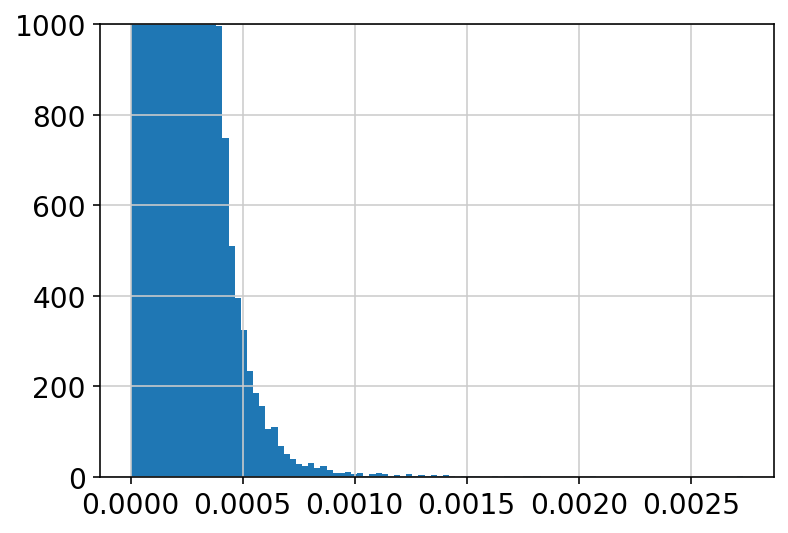

In [26]:
plt.hist(adata.obs['vbc_norm'],100)
plt.ylim(0,1000)

In [27]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:08)


In [28]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.5)

extracting highly variable genes
    finished (0:00:32)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [29]:
np.sum(adata.var['highly_variable'])

1145

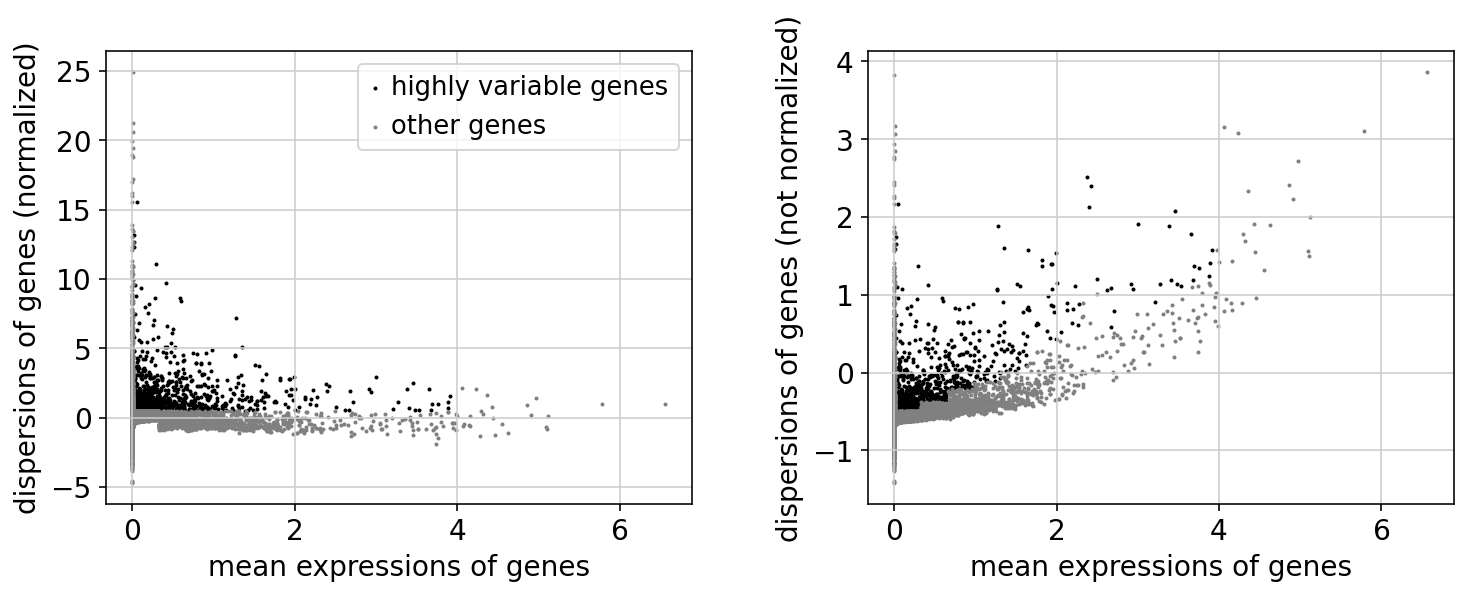

In [30]:
sc.pl.highly_variable_genes(adata)

In [31]:
adata.raw = adata

In [32]:
adata = adata[:, adata.var['highly_variable']]
adata

View of AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt', 'n_counts_original', 'guide', 'guide.compact', 'G12F', 'S136N', 'T50P', 'G12S', 'A146P', 'D33E', 'G12Y', 'G12A', 'G13V', 'I36M', 'R68S', 'K147T', 'A146T', 'G75A', 'G12C', 'Q61L', 'S17S', 'T158T', 'V14L', 'R135T', 'G60D', 'K117R', 'R41K', 'WT', 'T20M', 'E63K', 'Q99E', 'L79I', 'L19F', 'Q61R', 'Q61A', 'V14I', 'G12D', 'M111L', 'Q25H', 'K176Q', 'G60S', 'T50T', 'Y166H', 'A66A', 'A146V', 'T127T', 'K117N', 'L52F', 'V112I', 'I163S', 'C185Y', 'E31K', 'P34L', 'Q22K', 'P110S', 'A59T', 'L159S', 'G13E', 'A155G', 'T144T', 'R164Q', 'D57N', 'G60V', 'A59G', 'A59E', 'AG11TD', 'T20T', 'T74A', 'M170L', 'C118S', 'G13C', 'P34R', 'K88K', 'Q61H', 'F141L', 'D30D', 'G77A', 'Q61P', 'T74T', 'D119G', 'T50I', 'Q61K', 'D173D', 'K178K', 'N26Y', 'G12V', 'K179R', 'G12R', 'A130V', 'V8V', 'R149K', 'K169K', 'T144P', 'K5E', 'AG59GV

In [33]:
np.max(adata.obs['n_counts'])

50000.0

In [34]:
adata.obs['pct_counts_mt']

AAACCTGCAACGCACCch0      8.278197
AAACCTGCAATGGTCTch0      4.491224
AAACCTGCAGGACGTAch0      7.846643
AAACCTGCAGTAAGATch0      5.514286
AAACGGGAGACAGAGAch0      5.981284
AAACGGGAGCTAACAAch0      7.422222
AAACGGGAGTGATCGGch0      7.047120
AAACGGGAGTGTCCCGch0     11.000672
AAACGGGAGTTGAGATch0      6.344366
AAACGGGAGTTGTAGAch0      7.276357
AAACGGGCAGGAATCGch0      7.918793
AAACGGGGTCGATTGTch0      7.032570
AAACGGGGTCTAGAGGch0      5.679149
AAACGGGGTGATGATAch0      7.451372
AAACGGGTCCCTTGTGch0      7.830352
AAAGATGAGGAGTTGCch0      6.631812
AAAGATGAGTGGCACAch0      6.909204
AAAGATGCACGCCAGTch0      6.277301
AAAGATGCAGGACCCTch0      5.564453
AAAGATGCATACAGCTch0      5.807539
AAAGATGGTAAGCACGch0      4.913515
AAAGATGGTATTAGCCch0      7.173643
AAAGATGGTGTGACCCch0      8.128032
AAAGATGTCGAATGGGch0      7.259953
AAAGATGTCGTGGACCch0      6.764791
AAAGATGTCGTTTATCch0      7.014410
AAAGCAACAGGTCTCGch0      7.282980
AAAGCAAGTATCACCAch0      6.078234
AAAGCAAGTATGAAACch0      4.128864
AAAGCAAGTCTCCA

In [35]:
#batch correct
to_regress_out=[]
for batch in set(adata.obs['batch']):
    batch_vector=np.zeros((1,len(adata.obs_names)))
    for cell_idx in range(len(adata.obs_names)):
        if adata.obs['batch'][cell_idx]==batch:
            batch_vector[0,cell_idx]=1.0
    batchname='batch_num'+batch
    adata.obs[batchname]=batch_vector[0,:]
    to_regress_out.append(batchname)

#add total counts and percent mito to the stuff to regress out
#also regress out the vbc
to_regress_out.append('n_counts_original')
to_regress_out.append('pct_counts_mt')
to_regress_out.append('vbc_norm')
sc.pp.regress_out(adata,to_regress_out)

Trying to set attribute `.obs` of view, copying.


regressing out ['batch_num24', 'batch_num11', 'batch_num17', 'batch_num21', 'batch_num23', 'batch_num7', 'batch_num1', 'batch_num2', 'batch_num29', 'batch_num0', 'batch_num13', 'batch_num4', 'batch_num22', 'batch_num3', 'batch_num19', 'batch_num8', 'batch_num10', 'batch_num25', 'batch_num31', 'batch_num5', 'batch_num26', 'batch_num18', 'batch_num14', 'batch_num6', 'batch_num16', 'batch_num20', 'batch_num15', 'batch_num12', 'batch_num30', 'batch_num27', 'batch_num9', 'batch_num28', 'n_counts_original', 'pct_counts_mt', 'vbc_norm']
    sparse input is densified and may lead to high memory use
    finished (1:20:54)


In [36]:
adata.write(pref+'.batch_regr.h5ad')

In [37]:
adata=sc.read(pref+'.batch_regr.h5ad')
adata

Only considering the two last: ['.batch_regr', '.h5ad'].
Only considering the two last: ['.batch_regr', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'batch', 'channel', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_mt', 'protein', 'total_counts', 'total_counts_mt', 'n_counts_original', 'guide', 'guide.compact', 'G12F', 'S136N', 'T50P', 'G12S', 'A146P', 'D33E', 'G12Y', 'G12A', 'G13V', 'I36M', 'R68S', 'K147T', 'A146T', 'G75A', 'G12C', 'Q61L', 'S17S', 'T158T', 'V14L', 'R135T', 'G60D', 'K117R', 'R41K', 'WT', 'T20M', 'E63K', 'Q99E', 'L79I', 'L19F', 'Q61R', 'Q61A', 'V14I', 'G12D', 'M111L', 'Q25H', 'K176Q', 'G60S', 'T50T', 'Y166H', 'A66A', 'A146V', 'T127T', 'K117N', 'L52F', 'V112I', 'I163S', 'C185Y', 'E31K', 'P34L', 'Q22K', 'P110S', 'A59T', 'L159S', 'G13E', 'A155G', 'T144T', 'R164Q', 'D57N', 'G60V', 'A59G', 'A59E', 'AG11TD', 'T20T', 'T74A', 'M170L', 'C118S', 'G13C', 'P34R', 'K88K', 'Q61H', 'F141L', 'D30D', 'G77A', 'Q61P', 'T74T', 'D119G', 'T50I', 'Q61K', 'D173D', 'K178K', 'N26Y', 'G12V', 'K179R', 'G12R', 'A130V', 'V8V', 'R149K', 'K169K', 'T144P', 'K5E', 'AG59GV', 'T58I

In [38]:
#zscores
sc.pp.scale(adata, max_value=10)

#PCs
sc.tl.pca(adata,svd_solver='arpack',n_comps=50)
adata.obsm['X_pca'] *= -1
sc.pl.pca_variance_ratio(adata, log=True)

plt.plot(np.log(adata.uns['pca']['variance_ratio']))
plt.xlabel('PC')
plt.ylabel('variance ratio')
plt.show()
plt.plot(adata.uns['pca']['variance'])
plt.xlabel('PC')
plt.ylabel('variance')
plt.show()

computing PCA
    on highly variable genes
    with n_comps=50


In [39]:
sc.pp.neighbors(adata, n_neighbors=15) #15 neighbors is default
sc.tl.louvain(adata)

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:05:29)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:03:03)


In [40]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:07:42)


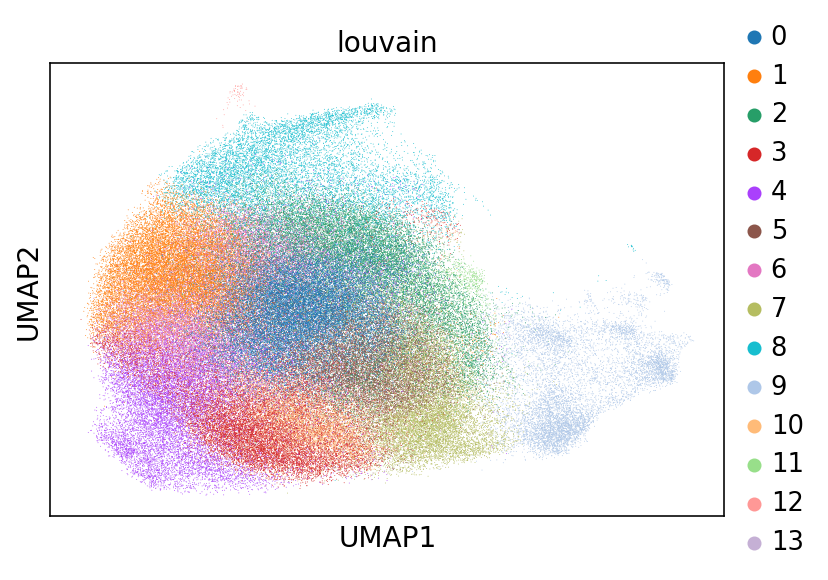

In [41]:
sc.pl.umap(adata,color=['louvain'])

In [42]:
adata.write(pref+'.analysis.h5ad')